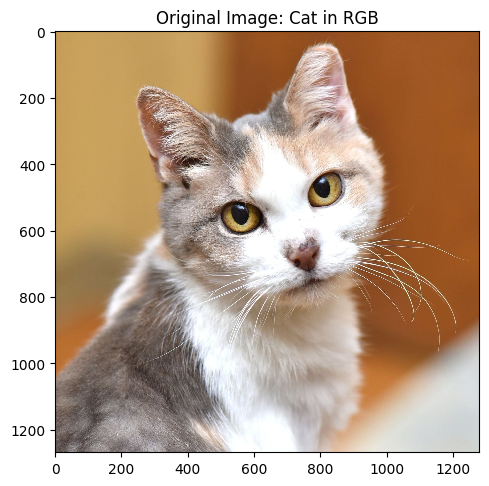

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, data, transform

from scipy import signal

fig, ax = plt.subplots()
img = io.imread("https://www.nj.com/resizer/mg42jsVYwvbHKUUFQzpw6gyKmBg=/1280x0/smart/advancelocal-adapter-image-uploads.s3.amazonaws.com/image.nj.com/home/njo-media/width2048/img/somerset_impact/photo/sm0212petjpg-7a377c1c93f64d37.jpg")
io.imshow(img)
plt.title("Original Image: Cat in RGB")
plt.show()

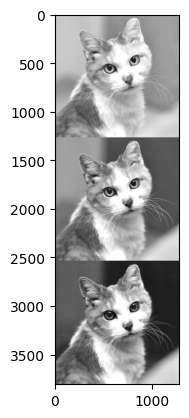

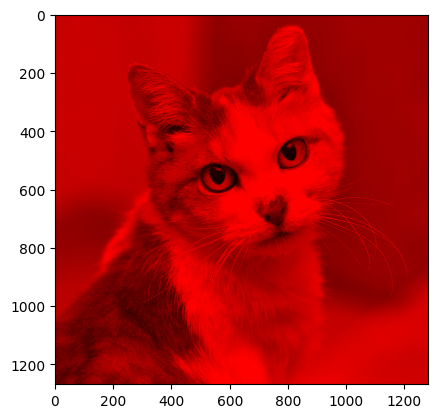

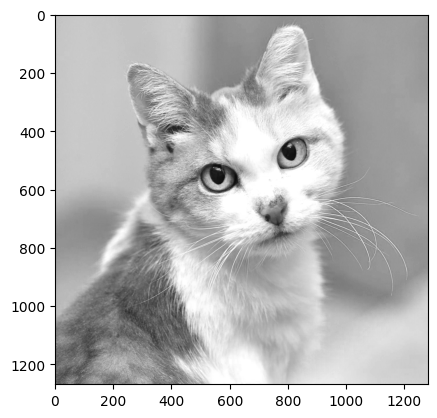

In [50]:
plt.figure()
plt.imshow(np.concatenate((img[:, :, 0], img[:, :, 1], img[:, :, 2])), cmap="gray")
img_R = np.array(img)
img_R[:, :, 1:] = 0
plt.figure()
plt.imshow(img_R)
plt.figure()
img2 = img_R[:, :, 0].astype("uint8")
plt.imshow(img2, cmap="gray")
plt.show()

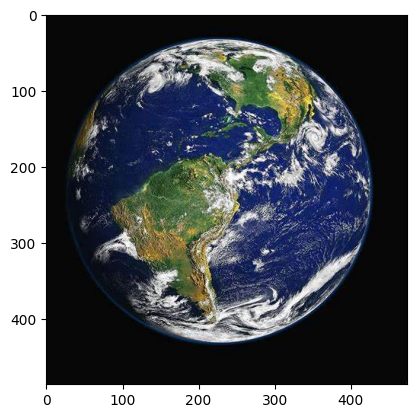

In [51]:
image_earth = io.imread("https://th.bing.com/th/id/OIP.O-9Tm9rXYEQ9QTSTQVvWwQAAAA?rs=1&pid=ImgDetMain")
fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(image_earth)
ax.set_aspect('equal')

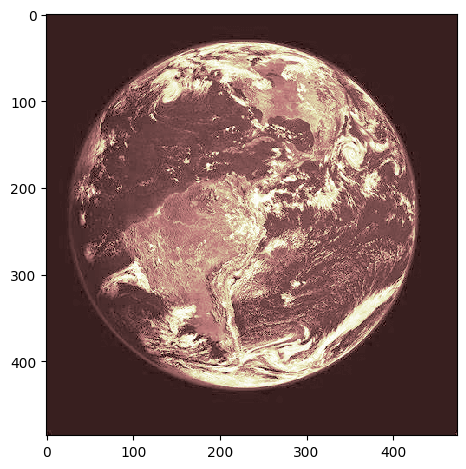

In [52]:
# Convert image to gray

image_earth = io.imread("https://th.bing.com/th/id/OIP.O-9Tm9rXYEQ9QTSTQVvWwQAAAA?rs=1&pid=ImgDetMain")
i_gray = 0.2126 * image_earth[:, :, 0] + 0.7152 * image_earth[:, :, 1] + 0.0722 * image_earth[:, :, 2]
i_gray = i_gray.astype(dtype="uint8")
io.imshow(i_gray, cmap='pink')

Sum error between methods:  89715
Average error:  0.38944887221961766


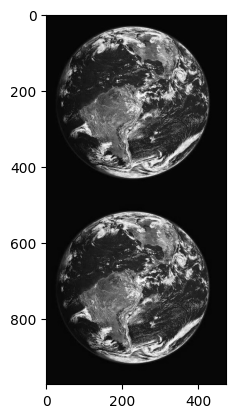

In [53]:
from skimage.color import rgb2gray

i_gray2 = (rgb2gray(image_earth)*255).astype(dtype=np.uint8)
print("Sum error between methods: ", np.sum((i_gray2 - i_gray)**2))
print("Average error: ", np.sum((i_gray2 - i_gray)**2)/i_gray2.size)
plt.figure()
plt.imshow(np.concatenate((i_gray, i_gray2)), cmap="gray")

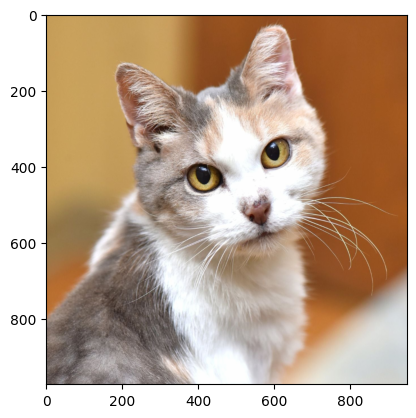

In [56]:
I_resized = transform.resize(img, np.array(i_gray.shape)*2)
plt.figure()
plt.imshow(I_resized)

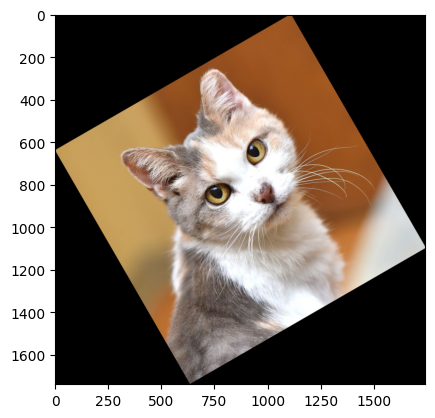

In [54]:
I_rotated = transform.rotate(img, 30, resize=True)
plt.figure()
plt.imshow(I_rotated)

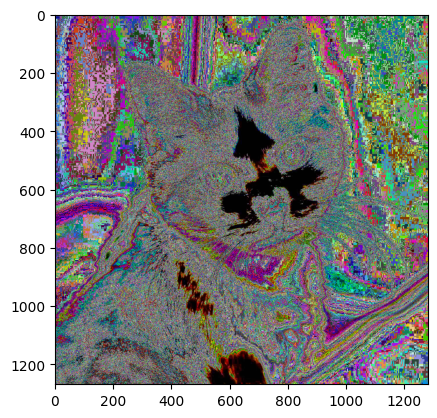

In [55]:
# Noise
plt.figure()
plt.imshow(img**2)

Text(0.5, 1.0, 'Convolved image')

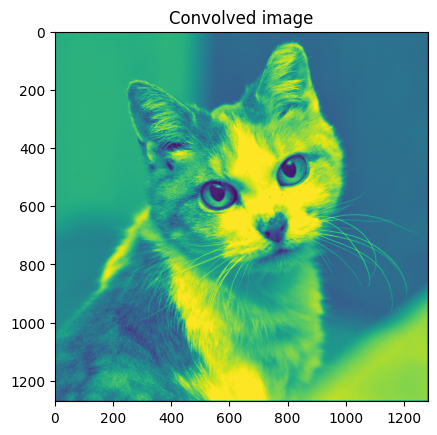

In [57]:
plt.figure()
g = np.array(np.array([[1, 2, 1]]) * np.array([[1], [2], [3]]) / 16) # mask
plt.imshow(signal.convolve2d(rgb2gray(img), g))
plt.title("Convolved image")

In [58]:
print("This is a mask: ", g)

This is a mask:  [[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.1875 0.375  0.1875]]
